# Projeto 3 Ciência dos Dados

##### Matheus Pellizzon, Pedro Ramos, Thiago Verardo

Ánálise de um Data Frame de vinhos tintos

Necessário:

*pip install pandas-profiling==1.4.0*

Nosso grupo visa executar um classificador de qualidade de vinhos tintos. Para isso, deve-se, primeiramente, selecionar um data frame com um grande número de linhas e colunas, para que uma análise melhor dos vinhos seja feita, em seguida, verificar a existência de argumentos inexistentes (NaN), caso existam, deve-se eliminar as linhas com eles. Com isso, o data frame estará limpo e pronto para ser trabalhado.

In [23]:
%matplotlib inline
import warnings
import numpy as np
import pandas as pd
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    import statsmodels.api as sm
    import pandas_profiling
import matplotlib.pyplot as plt

**Importando o DataFrame:**

In [24]:
df = pd.read_csv('wineQualityReds.csv')
df.head(3)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


**Analisando as variáveis do DataFrame:**

In [25]:
pandas_profiling.ProfileReport(df)

Number of variables,13
Number of observations,1599
Total Missing (%),0.0%
Total size in memory,162.5 KiB
Average record size in memory,104.1 B
Numeric,13
Categorical,0
Date,0
Text (Unique),0
Rejected,0
Distinct count,1599


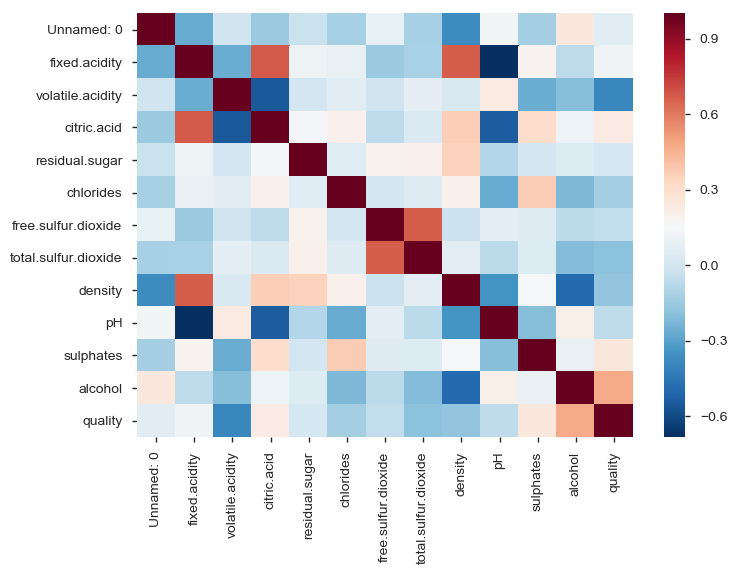

In [26]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap = 'RdBu_r')

Ao analisar a correlação das colunas entre si, pode-se preceber que existem apenas três correlações acima de 0.6, que são: Acidez Fixa com a Densidade, Acidez Fixa com o Ácido Cítrico e o Dióxido Sulfúrico Total com o Dióxido Sulfúrico Livre.

E correlações abaixo de -0.6, que são: Acidez Fixa com o pH, Acidez Volátil com o Ácido Cítrico e Densidade com o Álcool.

Essas correlações eram esperadas, dado que são muito próximas umas das outras. As correlações podem interferir na regressão linear, pois ao se relacionarem, essa regressão deixa de ser 100% útil, já que existe outro tipo de relação, que não a linear.

Caso a Regressão não fique precisa, retirar uma das variáveis que se correlacionam pode vir a resolver o problema.

**Embaralhando o Data Frame para futura análise dos dados:**

In [27]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(3)

,Unnamed: 0,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,1107,8.2,0.230,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,6
1,1080,7.9,0.300,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7
2,465,11.5,0.315,0.54,2.1,0.084,5.0,15.0,0.99870,2.98,0.70,9.2,6


In [28]:
treinamento = df[:1280]
teste = df[1280:]

In [29]:
X = treinamento[['fixed.acidity', 'volatile.acidity', 'citric.acid',
       'residual.sugar', 'chlorides', 'free.sulfur.dioxide',
       'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

Y = treinamento['quality']

In [30]:
#Xc = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     8834.
Date:                Wed, 07 Nov 2018   Prob (F-statistic):               0.00
Time:                        13:23:46   Log-Likelihood:                -1254.9
No. Observations:                1280   AIC:                             2532.
Df Residuals:                    1269   BIC:                             2588.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed.acidity           -0.0004      0.018     -0.022      0.983      -0.036       0.036
volatile.acidity        -1.0426      0.135     -7.717      0.000      -1.308      -0.778
citric.acid             -0.0430      0.167     -0.257      0.797      -0.371       0.285
residual.sugar           0.0012      0.013      0.095      0.924      -0.024       0.027
chlorides               -2.0477      0.462     -4.437      0.000      -2.953      -1.142
free.sulfur.dioxide      0.0055      0.002      2.285      0.022       0.001       0.010
total.sulfur.dioxide    -0.0034      0.001     -4.203      0.000      -0.005      -0.002
density                  4.8125      0.706      6.814      0.000       3.427       6.198
pH                      -0.5350      0.182     -2.934      0.003      -0.893      -0.177
sulphates                0.8460      0.126      6.724      0.000       0.599       1.093
alcohol                  0.2740      0.019     14.227      0.000       0.236       0.312
==============================================================================
Omnibus:                        9.884   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               12.327
Skew:                          -0.105   Prob(JB):                      0.00211
Kurtosis:                       3.432   Cond. No.                     2.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
B1 = -0.0004
B2 = -1.0426
B3 = -0.0430
B4 = 0.0012
B5 = -2.0477
B6 = 0.0055
B7 = -0.0034
B8 = 4.8125
B9 = -0.5350
B10 = 0.8460
B11 = 0.2740

In [50]:
previsao = [B1*teste['fixed.acidity']+B2*teste['volatile.acidity']+B3*teste['citric.acid']+B4*teste['residual.sugar']+\
                B5*teste['chlorides']+B6*teste['free.sulfur.dioxide']+B7*teste['total.sulfur.dioxide']+\
                B8*teste['density']+B9*teste['pH']+B10*teste['sulphates']+B11*teste['alcohol']]
previsao

[1280    5.176084
 1281    6.290086
 1282    5.677539
 1283    6.326550
 1284    5.132888
 1285    5.479498
 1286    6.135467
 1287    5.437011
 1288    5.308696
 1289    6.420339
 1290    5.865765
 1291    6.063094
 1292    5.136953
 1293    5.937045
 1294    5.133923
 1295    5.109544
 1296    4.997955
 1297    6.132848
 1298    5.445818
 1299    6.093863
 1300    6.526007
 1301    5.016020
 1302    6.859987
 1303    5.252795
 1304    5.488059
 1305    5.042324
 1306    5.139450
 1307    5.535047
 1308    5.516202
 1309    5.317250
           ...   
 1569    5.069814
 1570    6.494518
 1571    5.885378
 1572    6.044445
 1573    4.931599
 1574    5.305909
 1575    5.120591
 1576    5.053980
 1577    5.528885
 1578    5.572095
 1579    6.254030
 1580    5.366262
 1581    6.006098
 1582    5.286909
 1583    6.684826
 1584    5.680002
 1585    5.592418
 1586    5.951130
 1587    5.412115
 1588    5.035326
 1589    5.960704
 1590    6.471384
 1591    5.535335
 1592    5.107868
 1593    6